<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/capstone/ideas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import random

points = []
for i in range(1000):
  for j in range(1000):
    points.append((i, j))

random.shuffle(points)

with open("puntosentrega.csv", 'w') as f:
  for i in points[:5000]:
    f.write(str(i[0]) + "," + str(i[1]) + "\n")

with open("almacenes.csv", 'w') as f:
  for i in points[5000:5100]:
    f.write(str(i[0]) + "," + str(i[1]) + "\n")

In [6]:
import numpy as np
import pandas as pd

In [7]:
pentrega = pd.read_csv("puntosentrega.csv", header=None).to_numpy()
almacenes = pd.read_csv("almacenes.csv", header=None).to_numpy()

print(pentrega.shape)
print(almacenes.shape)

(5000, 2)
(100, 2)


In [8]:
import matplotlib.pyplot as plt

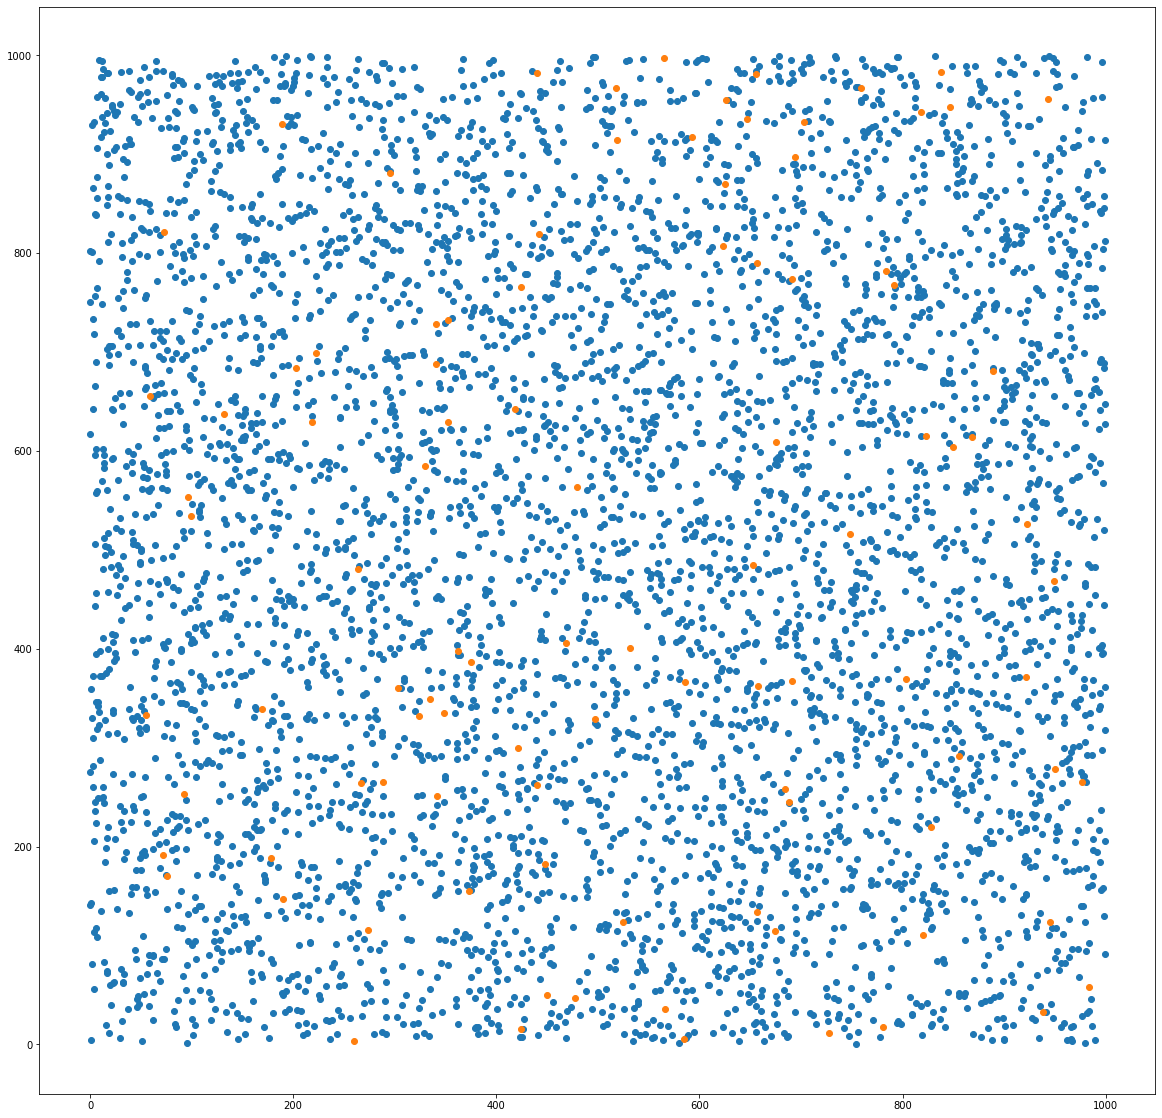

In [9]:
plt.subplots(figsize=(20, 20))

plt.scatter(pentrega[:, 0], pentrega[:, 1])
plt.scatter(almacenes[:, 0], almacenes[:, 1])

In [10]:
def dist(a, b):
  xa, ya = a
  xb, yb = b

  return abs(xa - xb) + abs(ya - yb)

In [11]:
groups = [0]*5000

for i, a in enumerate(pentrega):
  group = 0
  mindist = dist(a, almacenes[0])
  for j, b in enumerate(almacenes):
    d = dist(a, b)
    if d < mindist:
      mindist = d
      group = j
  groups[i] = group

In [12]:
counts = [0]*100

for g in groups:
  counts[g] += 1

print(groups[:20])


[24, 86, 92, 31, 14, 64, 36, 57, 99, 28, 60, 18, 86, 42, 28, 74, 53, 19, 9, 91]


In [13]:
pentrega2 = np.c_[pentrega, groups]
print(pentrega2[:10])

[[192 972  24]
 [726  32  86]
 [459  18  92]
 [753 426  31]
 [346  82  14]
 [123 817  64]
 [513  29  36]
 [123  36  57]
 [951 118  99]
 [143 649  28]]


In [14]:
dfpentrega = pd.DataFrame(pentrega2)
dfpentrega.head()

,0,1,2
0,192,972,24
1,726,32,86
2,459,18,92
3,753,426,31
4,346,82,14


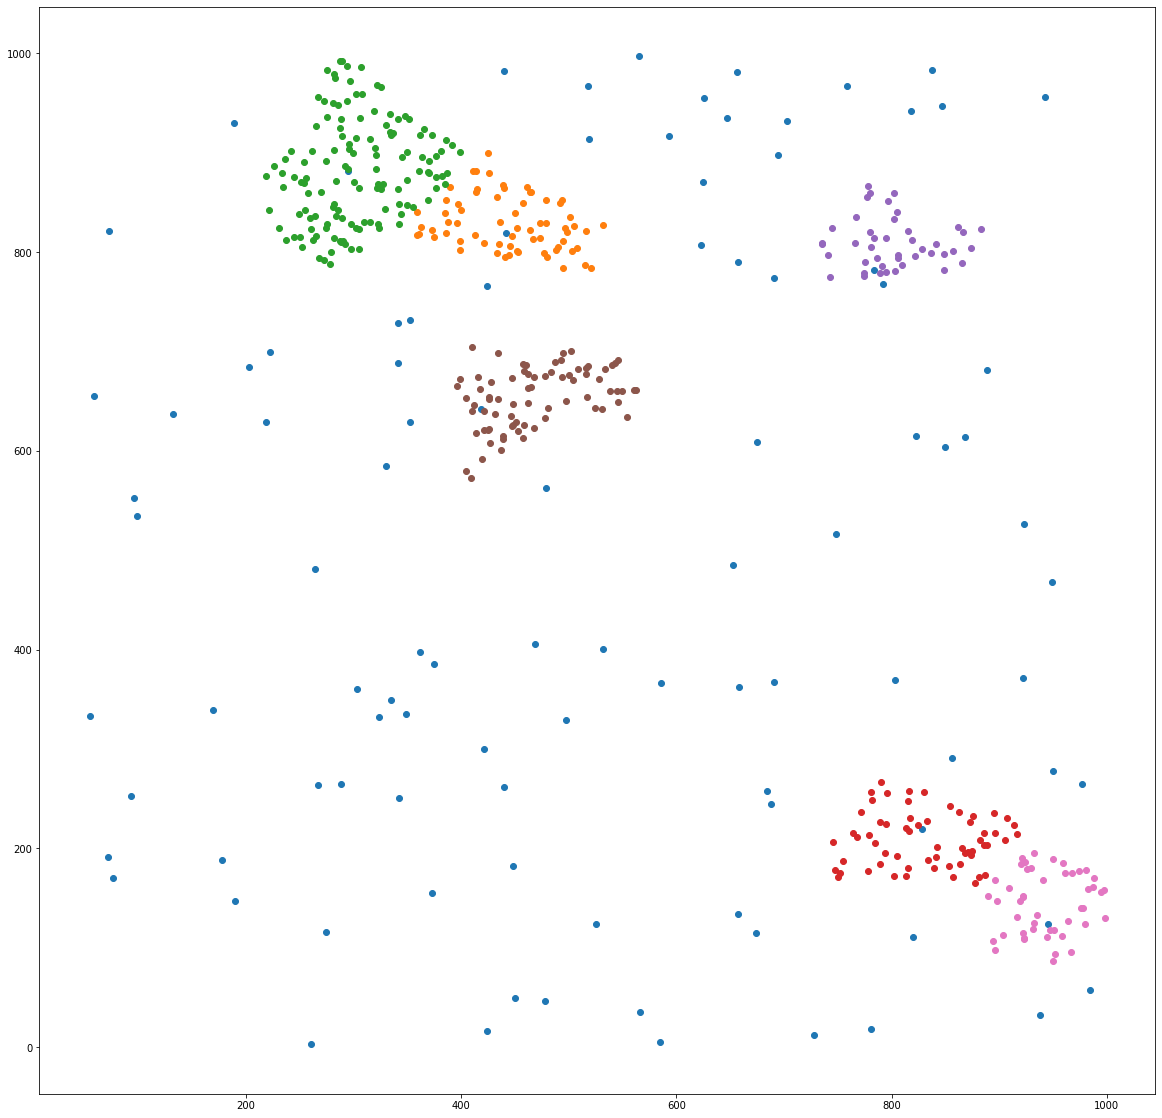

In [15]:
plt.subplots(figsize=(20, 20))

show = [1, 10, 30, 50, 80, 99]

plt.scatter(almacenes[:, 0], almacenes[:, 1])
for alm in show:
  dftemp = dfpentrega[dfpentrega[2] == alm]
  plt.scatter(dftemp[0], dftemp[1])

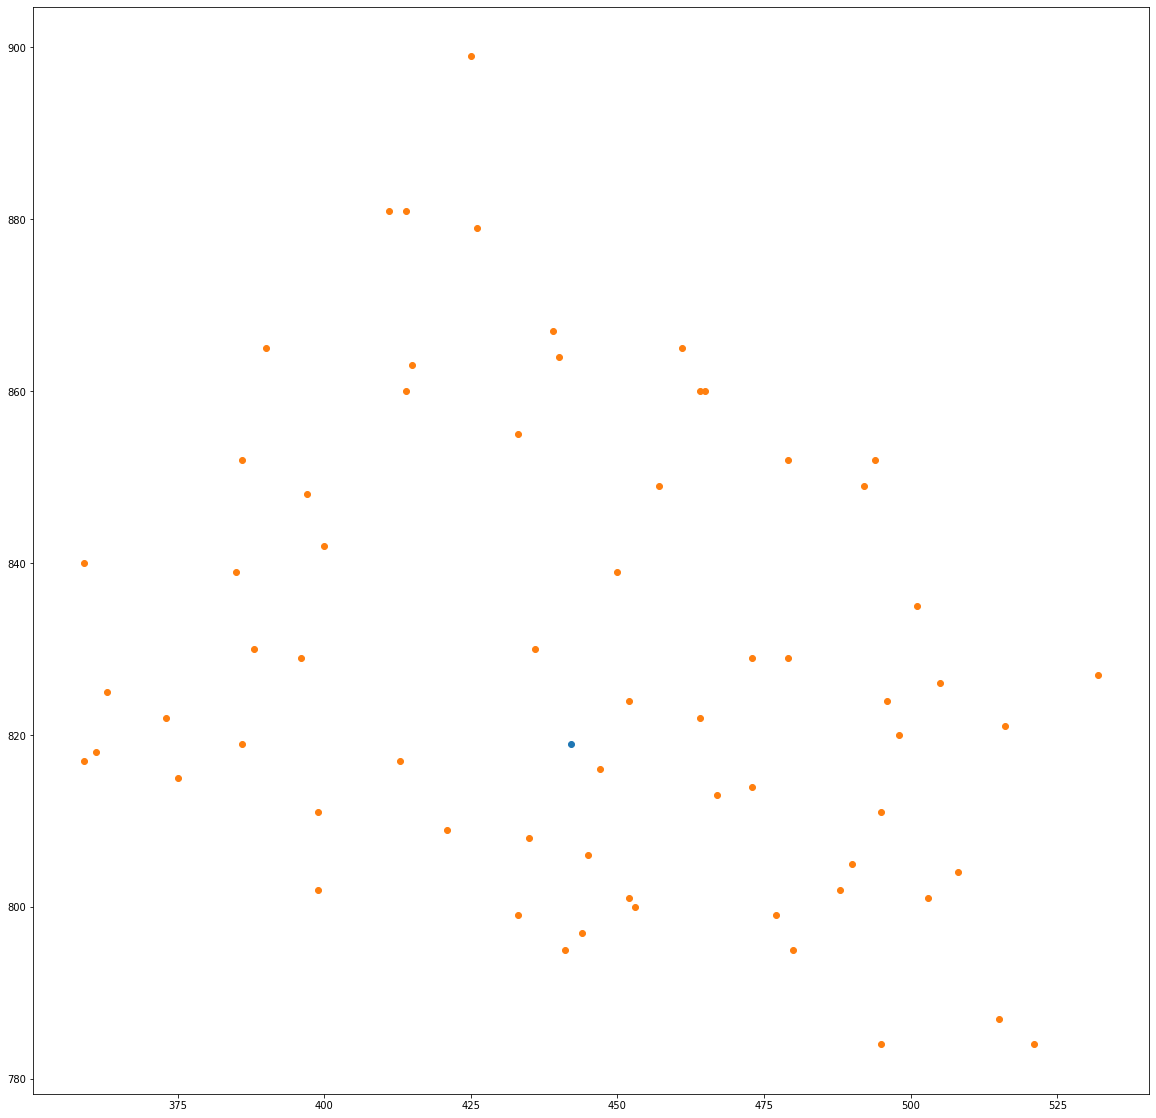

In [16]:
plt.subplots(figsize=(20, 20))

plt.scatter(almacenes[1, 0], almacenes[1, 1])

dftemp = dfpentrega[dfpentrega[2] == 1]
plt.scatter(dftemp[0], dftemp[1])